In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [4]:
import os
os.chdir('drive/MyDrive/AI+X선도인재양성프로젝트/003.지하철 이용승객 EDA분석_숙제_20220914/실습')
%load_ext autoreload
%autoreload 2

In [5]:
!ls

'1.지하철 이용승객 분석 EDA 프로젝트(1).ipynb'
'2호선 역 승차 빈도(합계).html'
'AI+X기초프로젝트_실습(김정우, 2019상반기).ipynb'
'AI+X기초프로젝트_실습(김정우, 2019전체).ipynb'
'AI+X기초프로젝트_실습(김정우, 2020전체).ipynb'
'AI+X기초프로젝트_실습(김정우, 2021전체).ipynb'
'AI+X기초프로젝트_실습(김정우, 2022전체).ipynb'
'AI+X기초프로젝트_실습(김정우, 2023전체).ipynb'
'AI+X기초프로젝트_실습(김정우, 2024상반기).ipynb'
'AI+X기초프로젝트_실습(김정우, 통계검정 포함).ipynb'
'AI+X연습(이상치를 평균으로 변환 후 주어진 문제들을 평균으로 구함).ipynb'
'AI+X연습(이상치를 평균으로 변환 후 주어진 문제들을 합계로 구함).ipynb'
'AI+X연습(총합(sum)으로 그래프 구함).ipynb'
'AI+X연습(평균으로 그래프 구함).ipynb'
 rawfiles
 rawfiles.zip
 subway_raw.csv
'subway_raw 데이터 전처리(2020.01~2023.06합치기).ipynb'
'subway_raw 데이터 전처리.ipynb'
'subway_raw 데이터 전처리(연도 전체용).ipynb'
'기온 데이터

In [6]:
# 한글 깨짐 방지 위해 구글 코랩에 나눔폰트 설치.
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123629 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [7]:
# 코랩에서 사용가능한 폰트 확인.
from matplotlib.font_manager import findSystemFonts
findSystemFonts()

['/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/Nanum

In [8]:
# 나눔고딕으로 폰트 변경
plt.rcParams['font.family'] = 'NanumGothic'

In [9]:
# matplot의 폰트와 폰트 크기 확인
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumGothic'] 10.0


##subway_raw 데이터 전처리

In [10]:
# 만약 인코딩이 utf-8이 아니라면 변환 후 덮어쓰는 코드
# import pandas as pd
# import chardet

# # 2월 데이터 파일 경로 설정
# month = 2
# original_file = f'rawfiles/CARD_SUBWAY_MONTH_20240{month}.csv'

# # 파일의 현재 인코딩 확인
# with open(original_file, 'rb') as f:
#     result = chardet.detect(f.read())
# encoding = result['encoding']

# # 원본 파일을 읽고 UTF-8로 저장
# df = pd.read_csv(original_file, encoding=encoding)
# df.to_csv(original_file, index=False, encoding='utf-8')

In [11]:
raw_df = pd.read_csv('rawfiles/CARD_SUBWAY_MONTH(2021).csv')
raw_df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2021-01-01,금,1호선,동대문,3971,3799,7770,2021-01,01-01
1,2021-01-01,금,1호선,동묘앞,4153,4491,8644,2021-01,01-01
2,2021-01-01,금,1호선,서울역,9260,9858,19118,2021-01,01-01
3,2021-01-01,금,1호선,시청,2906,2654,5560,2021-01,01-01
4,2021-01-01,금,1호선,신설동,3367,3017,6384,2021-01,01-01


In [12]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219251 entries, 0 to 219250
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   사용일자     219251 non-null  object
 1   요일       219251 non-null  object
 2   노선명      219251 non-null  object
 3   역명       219251 non-null  object
 4   승차총승객수   219251 non-null  int64 
 5   하차총승객수   219251 non-null  int64 
 6   승하차총승객수  219251 non-null  int64 
 7   연월       219251 non-null  object
 8   월일       219251 non-null  object
dtypes: int64(3), object(6)
memory usage: 15.1+ MB


In [13]:
raw_df['사용일자'] = pd.to_datetime(raw_df['사용일자'], format='%Y-%m-%d') # 사용일자의 자료형을 int에서 datatime으로 형변환
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219251 entries, 0 to 219250
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   사용일자     219251 non-null  datetime64[ns]
 1   요일       219251 non-null  object        
 2   노선명      219251 non-null  object        
 3   역명       219251 non-null  object        
 4   승차총승객수   219251 non-null  int64         
 5   하차총승객수   219251 non-null  int64         
 6   승하차총승객수  219251 non-null  int64         
 7   연월       219251 non-null  object        
 8   월일       219251 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 15.1+ MB


## NaN값 확인

In [14]:
raw_df.isna().sum() # nan값 확인. 확인 결과 nan값(결측치)이 없으므로 결측치 처리는 생략.

,0
사용일자,0
요일,0
노선명,0
역명,0
승차총승객수,0
하차총승객수,0
승하차총승객수,0
연월,0
월일,0


## 중복데이터 확인

In [15]:
raw_df.duplicated(['사용일자','요일', '노선명', '역명', '연월', '월일'], keep=False).sum() # duplicated()로 중복 데이터 확인. 매개변수로 기준이 될 컬럼(여러 개면 리스트로 넣음)을 넣어주면 됨.
                                                                                           # 기준이 된 컬럼들에 대한 data가 모두 같을 때만 중복데이터임. 그 중복데이터들의 개수을 구해봄.
                                                                                           # keep=False는 gpt검색해보면 쉽게 알 수 있음. keep=False면 중복된 데이터를 모두 포함시킴.

0

In [16]:
raw_df.describe() # subway_raw 데이터프레임의 요약통계량

,사용일자,승차총승객수,하차총승객수,승하차총승객수
count,219251,219251.000000,219251.000000,219251.000000
mean,2021-07-02 05:48:48.211045632,9157.387351,9125.860457,18283.247807
min,2021-01-01 00:00:00,1.000000,0.000000,1.000000
25%,2021-04-02 00:00:00,3087.000000,2984.000000,6094.000000
50%,2021-07-02 00:00:00,6512.000000,6379.000000,12931.000000
75%,2021-10-01 00:00:00,12094.000000,11939.000000,24051.000000
max,2021-12-31 00:00:00,92833.000000,93604.000000,185033.000000
std,NaN,9189.247839,9281.791093,18447.369432


In [17]:
raw_df.describe(include='object') # subway_raw 데이터프레임의 요약통계량(문자형 data)

,요일,노선명,역명,연월,월일
count,219251,219251,219251,219251,219251
unique,7,25,523,12,365
top,금,5호선,서울역,2021-12,11-07
freq,31838,20185,1825,18686,605


In [18]:
# month = ['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06']
# df = raw_df[raw_df['연월'].isin(month)]

In [19]:
df = raw_df.copy()

In [20]:
!pip install scikit-posthocs # 사후검정을 위해 설치 필요.

## 인사이트 관련 주차별 승하차 승객수

In [21]:
sub_df = df.set_index('사용일자')
sub_df

,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
사용일자,,,,,,,,
2021-01-01,금,1호선,동대문,3971,3799,7770,2021-01,01-01
2021-01-01,금,1호선,동묘앞,4153,4491,8644,2021-01,01-01
2021-01-01,금,1호선,서울역,9260,9858,19118,2021-01,01-01
2021-01-01,금,1호선,시청,2906,2654,5560,2021-01,01-01
2021-01-01,금,1호선,신설동,3367,3017,6384,2021-01,01-01
...,...,...,...,...,...,...,...,...
2021-12-31,금,중앙선,원덕,253,273,526,2021-12,12-31
2021-12-31,금,중앙선,중랑,5117,4851,9968,2021-12,12-31
2021-12-31,금,중앙선,지평,45,46,91,2021-12,12-31


In [22]:
week_df = sub_df['승하차총승객수'].resample('W').sum()
week_df.head()

,승하차총승객수
사용일자,
2021-01-03,11808334
2021-01-10,63757745
2021-01-17,67104909
2021-01-24,70413106
2021-01-31,71776034


In [23]:
week_df = week_df.reset_index()
week_df = week_df['승하차총승객수'][1:-1]
week_df.head()

,승하차총승객수
1,63757745
2,67104909
3,70413106
4,71776034
5,74716753


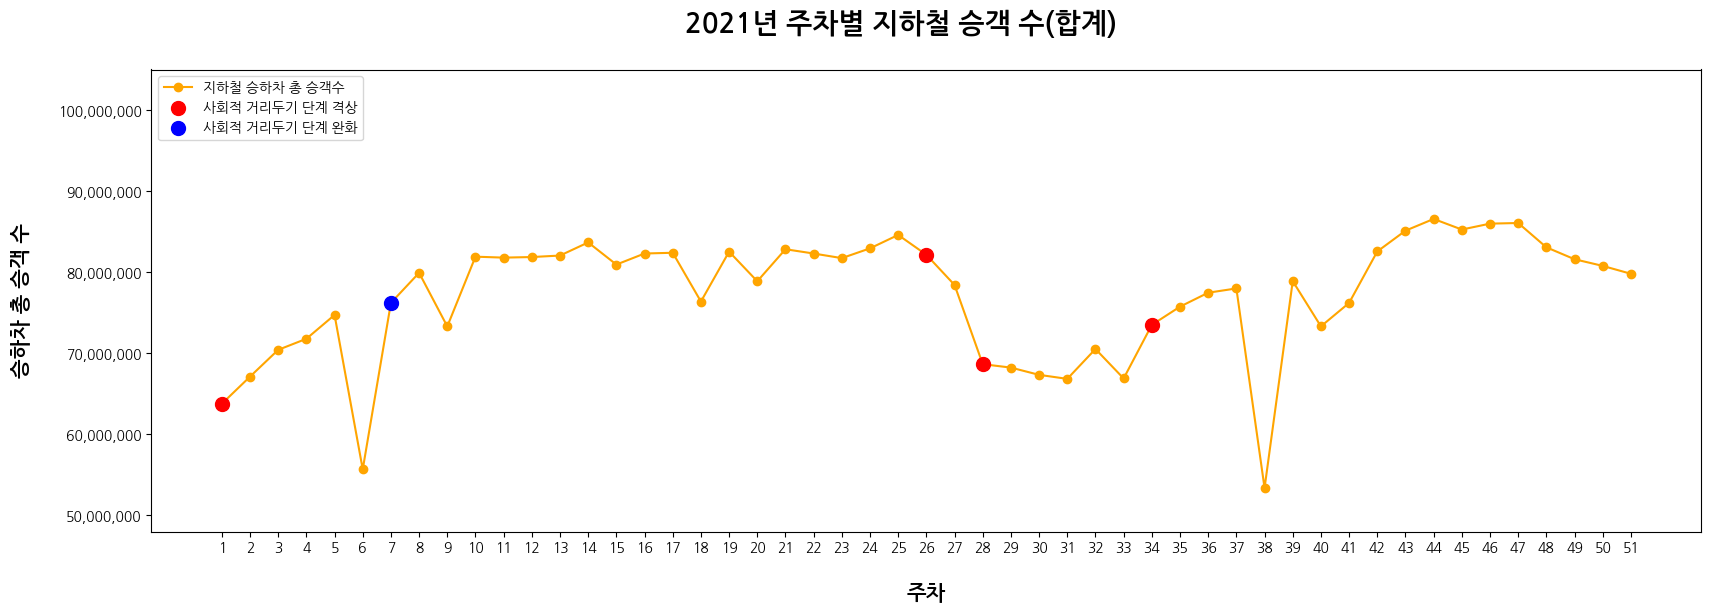

In [24]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(week_df, marker='o', c='orange', label='지하철 승하차 총 승객수')

# 특정 인덱스의 데이터에만 색칠
highlight_indices = [0, 25, 27, 33]
highlight_values = [week_df.iloc[i] for i in highlight_indices]

ax.scatter(week_df.index[highlight_indices], highlight_values, color='red', s=100, zorder=5, label='사회적 거리두기 단계 격상')

highlight_indices02 = [6]
highlight_values02 = [week_df.iloc[i] for i in highlight_indices02]

ax.scatter(week_df.index[highlight_indices02], highlight_values02, color='blue', s=100, zorder=5, label='사회적 거리두기 단계 완화')

# y축 숫자 포맷
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.legend(loc='upper left')

ax.set_ylim(48000000, 105000000) # y축의 범위 설정.

# x, y축 이름과 그래프 이름.
ax.set_xticks(week_df.index)
fig.suptitle('2021년 주차별 지하철 승객 수(합계)', fontsize=20, fontweight='bold')
ax.set_xlabel('주차', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('승하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)

plt.show()

##2021년에 언제 지하철을 가장 많이 이용했을까? (기준: 승하차총승객수)

In [25]:
passengers_of_day = df[['사용일자','승하차총승객수']].copy()
passengers_of_day['사용일자'] = passengers_of_day['사용일자'].astype(str)  # 그래프가 잘 그려지기 위해 '사용일자'를 str로 변환. 판다스 dataframe에서 문자형은 object. object라 적어도 됨.
passengers_of_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219251 entries, 0 to 219250
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   사용일자     219251 non-null  object
 1   승하차총승객수  219251 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ MB


In [26]:
passengers_of_day = passengers_of_day.groupby(['사용일자'])['승하차총승객수'].sum()  # 각각의 '사용일자'별로 '승하차총승객수'의 합을 구함.
passengers_of_day.head()

,승하차총승객수
사용일자,
2021-01-01,3149873
2021-01-02,4866851
2021-01-03,3791610
2021-01-04,10493167
2021-01-05,10478875


In [27]:
passengers_of_day = passengers_of_day.sort_values(ascending=False) # 승하차총승객수를 내림차순으로 정렬.
passengers_of_day

,승하차총승객수
사용일자,
2021-11-05,14250817
2021-11-26,14234887
2021-11-19,14205510
2021-05-14,14189734
2021-06-25,14183314
...,...
2021-01-10,4016505
2021-09-21,3807247
2021-01-03,3791610


In [28]:
passengers_of_day_top10 = passengers_of_day[:10]   # 상위 10개만 저장.
passengers_of_day_top10

,승하차총승객수
사용일자,
2021-11-05,14250817
2021-11-26,14234887
2021-11-19,14205510
2021-05-14,14189734
2021-06-25,14183314
2021-11-12,14136635
2021-05-18,14063492
2021-04-02,14017145
2021-07-02,14009104


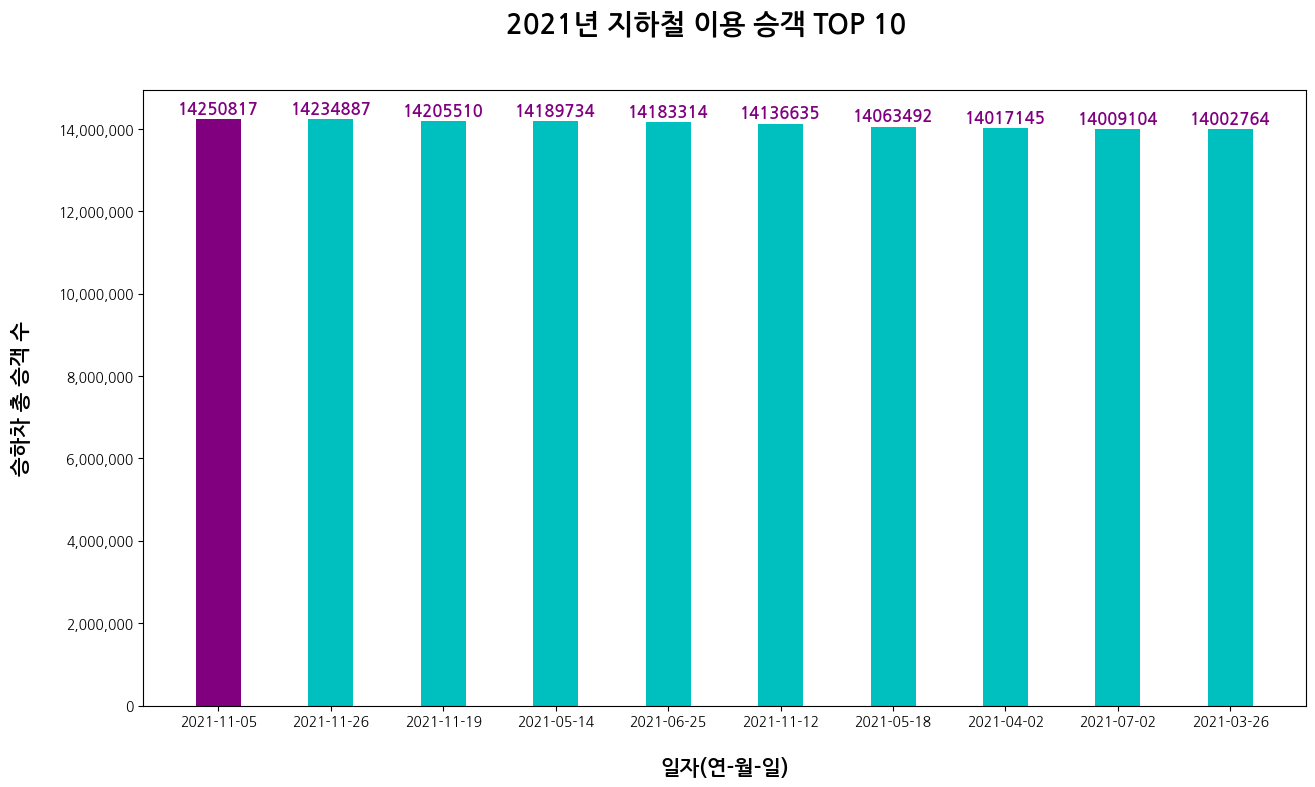

In [29]:
# 기존 숫자의 스케일을 유지하기 위한 모듈 import
import matplotlib.ticker as mtick

# 그래프 색깔을 리스트로 만듬. 최대값은 보라색으로 표현.
color = ['purple','c','c','c','c','c','c','c','c','c']

# fig는 그림 객체, ax는 하위 그래프 객체. figsize는 전체 그림판의 크기(그림판 안에 하위 그래프가 그려짐).
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(passengers_of_day_top10.index, passengers_of_day_top10.values, width=0.4, color=color)  # 막대그래프. 매개변수: (x축, y축, 그래프 폭, 색깔),  x축에 '사용일자'(index)를, y축에 '승하차총승객수(values)'를 놓음.

# 막대 그래프 위의 주석을 표시하기 위한 for문. 첫번째 매개변수는 주석에 표시할 값, 두번째는 그 주석을 놓을 위치. 자세한 내용은 gpt 참조.
for idx, val in passengers_of_day_top10.items():
        plt.annotate(int(val), (idx, val), xytext=(0,4), textcoords='offset points', ha='center', color='purple', fontsize=12, fontweight='bold')

# # 기존 숫자의 단위를 유지하기 위해 작성한 코드. {int(x):,}에서 ','는 천 단위마다 컴마를 추가 하기 위함.
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

# x,y축 이름과 그래프 이름.
fig.suptitle('2021년 지하철 이용 승객 TOP 10', fontsize=20, fontweight='bold')
ax.set_xlabel('일자(연-월-일)', fontsize=15, fontweight='bold', labelpad=20)  # labelpad는 그래프와 축 이름의 간격을 설정하는 매개변수.
ax.set_ylabel('승하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)

plt.show()

In [30]:
 # '승하차총승객수'가 가장 큰 값의 인덱스 추출. passengers_of_day의 인덱스가 날짜이므로 날짜가 출력됨.
passengers_of_day.idxmax()

'2021-11-05'

In [31]:
# D'Agostino's K-squared 검정은 데이터가 정규분포를 따르는지 여부를 확인하는 통계적 방법.
# 이 검정은 정규성 가정을 확인할 때 사용하는 여러 검정 중 하나로, 데이터가 정규성을 만족하지 않는지 판단하는 데 유용.
# 왜도(skewness)와 첨도(kurtosis)를 함께 고려함(데이터가 정규분포를 따르면 둘다 0에 가까움).

In [32]:
# TOP10에서 사용일자별로 승하차총승객수가 유의미한 차이가 있는가.
from scipy import stats
date_list = list(passengers_of_day_top10.index)
test_df =  df[df['사용일자'].astype(str).isin(date_list)].copy()

# 사용일자별로 승객 수가 유의미한 차이가 있는가.
grouped = test_df.groupby('사용일자')

# 사용일자별로 D'Agostino's K-squared 검정을 수행
for date, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['승하차총승객수'].dropna())
    print(f"사용일자: {date} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{date}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{date}: 데이터는 정규분포를 따릅니다.")

사용일자: 2021-03-26 00:00:00 - D’Agostino’s K-squared Test Statistic: 316.36073216323086, p-value: 2.00973994875848e-69
2021-03-26 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2021-04-02 00:00:00 - D’Agostino’s K-squared Test Statistic: 312.59995101224126, p-value: 1.3175985738215406e-68
2021-04-02 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2021-05-14 00:00:00 - D’Agostino’s K-squared Test Statistic: 315.95921985028303, p-value: 2.456558757286645e-69
2021-05-14 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2021-05-18 00:00:00 - D’Agostino’s K-squared Test Statistic: 318.2714691891793, p-value: 7.730873944407226e-70
2021-05-18 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2021-06-25 00:00:00 - D’Agostino’s K-squared Test Statistic: 329.9096424719639, p-value: 2.296314530221028e-72
2021-06-25 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2021-07-02 00:00:00 - D’Agostino’s K-squared Test Statistic: 325.0338890352984, p-value: 2.6289830145598813e-71
2021-07-02 00:00:00: 데이터는 정규분포를 따르지 않습니다.
사용일자: 2021-11-05 00:00:00 - D’Agostino’s K

In [33]:
# 비모수적: 통계 분석에서 특정한 분포 가정을 하지 않는 방법을 의미. 비교할 data가 정규분포를 따르지 않을 경우 사용 가능.
# 비모수적 ANOVA(분산분석, Analysis of Variance)방법으로 가장 일반적으로 사용하는 것이 크러스칼-월리스 검정(Kruskal-Wallis test).
# 이 검정은 세 개 이상의 독립적인 집단 간에 중앙값 차이가 있는지를 비교하는 비모수적 방법.
# 크러스칼-월리스 검정은 각 집단의 분포가 정규성을 따르지 않거나, 데이터의 분산이 일정하지 않은 경우에도 사용.
# 이상치가 많거나 데이터의 분포가 왜곡된 경우에도 비모수적 방법이 유리할 수 있음.

In [34]:
# Dunn's Test는 여러 집단 간의 차이를 비교하기 위해 사용되는 사후검정(post-hoc test) 중 하나.
# 크러스칼-월리스 검정에서 유의미한 결과가 나왔을 때, 어느 집단 간에 차이가 있는지를 구체적으로 확인하기 위해 사용.

In [35]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

# 사용일자별로 승하차총승객수 리스트 생성
grouped_data = test_df.groupby(['사용일자'])['승하차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='승하차총승객수', group_col='사용일자', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4)) # 소수점 4째자리까지 표현(반올림 포함). 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 0.34413059323258954, p-value: 0.9999939636929682
유의미한 차이가 없습니다.


##1월~6월중에 5월에 지하철 승객수가 많다? (기준 :승하차총승객수)

In [36]:
# 각각의 '연월'별로 '승하차총승객수'의 합을 구함.
passengers_of_month = df.groupby(['연월'])['승하차총승객수'].sum()
passengers_of_month

,승하차총승객수
연월,
2021-01,284860128
2021-02,286506074
2021-03,358818099
2021-04,355958626
2021-05,348937483
2021-06,358726167
2021-07,319839109
2021-08,306359694
2021-09,310726292


In [37]:
# '승하차총승객수'가 가장 큰 값의 인덱스 추출. passengers_of_day의 인덱스가 '연월'이므로 '연월'이 출력됨.
passengers_of_month.idxmax()

'2021-11'

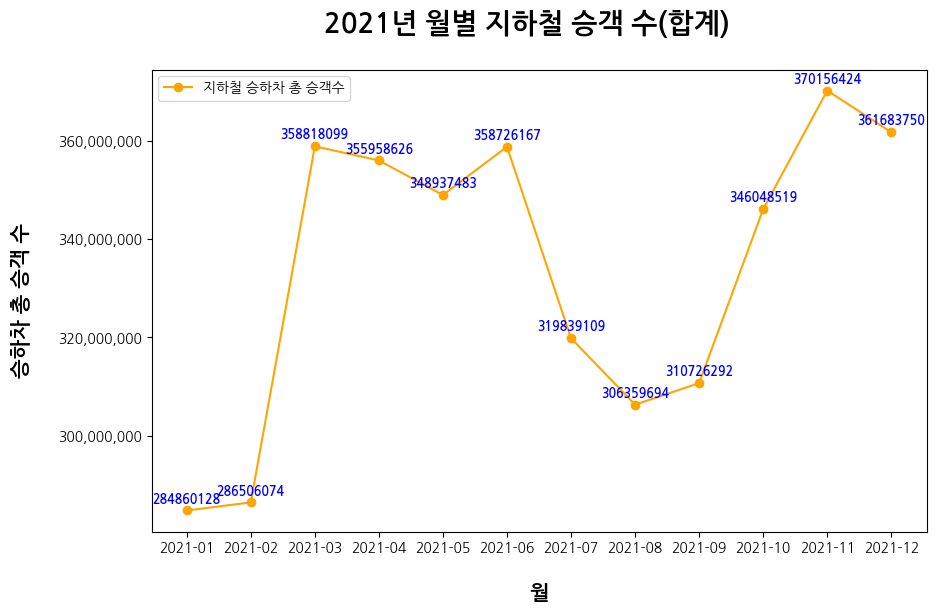

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(passengers_of_month, marker='o', c='orange', label='지하철 승하차 총 승객수') # 선(plot) 그래프. 첫번째 매개변수로 시리즈 객체 넣어줌(여기서는 passengers_of_month)
                                                                                   # marker는 데이터 값마다 o표시. c는 그래프 색깔, label은 범례 안에 들어갈 이 그래프의 이름.

# 그래프 위에 주석 추가
for idx, val in passengers_of_month.items():
    ax.annotate(int(val), (idx, val), xytext=(0, 6), textcoords='offset points', ha='center',
                fontsize=9, fontweight='bold', color='blue')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.
ax.legend(loc='upper left') # 범례 추가

# x,y축 이름과 그래프 이름.
fig.suptitle('2021년 월별 지하철 승객 수(합계)', fontsize=20, fontweight='bold')
ax.set_xlabel('월', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('승하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)

plt.show()

In [39]:
# 월별로 승하차총승객수가 유의미한 차이가 있는가.
from scipy import stats
test_df = df.copy()

# '승하차총승객수'에 대한 정규성 검정을 월별로 수행
grouped = test_df.groupby('연월')

# 월별로 D'Agostino's K-squared 검정을 수행
for month, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['승하차총승객수'].dropna())
    print(f"월: {month} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{month}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{month}: 데이터는 정규분포를 따릅니다.")

월: 2021-01 - D’Agostino’s K-squared Test Statistic: 10316.711881438005, p-value: 0.0
2021-01: 데이터는 정규분포를 따르지 않습니다.
월: 2021-02 - D’Agostino’s K-squared Test Statistic: 9584.882349419218, p-value: 0.0
2021-02: 데이터는 정규분포를 따르지 않습니다.
월: 2021-03 - D’Agostino’s K-squared Test Statistic: 9909.280033806834, p-value: 0.0
2021-03: 데이터는 정규분포를 따르지 않습니다.
월: 2021-04 - D’Agostino’s K-squared Test Statistic: 9443.070253373226, p-value: 0.0
2021-04: 데이터는 정규분포를 따르지 않습니다.
월: 2021-05 - D’Agostino’s K-squared Test Statistic: 10310.576277105492, p-value: 0.0
2021-05: 데이터는 정규분포를 따르지 않습니다.
월: 2021-06 - D’Agostino’s K-squared Test Statistic: 9636.048063609449, p-value: 0.0
2021-06: 데이터는 정규분포를 따르지 않습니다.
월: 2021-07 - D’Agostino’s K-squared Test Statistic: 10337.148717305043, p-value: 0.0
2021-07: 데이터는 정규분포를 따르지 않습니다.
월: 2021-08 - D’Agostino’s K-squared Test Statistic: 10125.992426444727, p-value: 0.0
2021-08: 데이터는 정규분포를 따르지 않습니다.
월: 2021-09 - D’Agostino’s K-squared Test Statistic: 9656.022975286767, p-value: 0.0


In [40]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

# 월별로 승하차총승객수 리스트 생성
grouped_data = test_df.groupby(['연월'])['승하차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='승하차총승객수', group_col='연월', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4)) # 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 1989.6736032718957, p-value: 0.0
유의미한 차이가 있으므로 Dunn's Test 사후검정 수행
         2021-01  2021-02  2021-03  2021-04  2021-05  2021-06  2021-07  \
2021-01      1.0   0.0000   0.0000   0.0000   0.0000   0.0000    0.000   
2021-02      0.0   1.0000   0.0000   0.0000   0.0000   0.0000    0.074   
2021-03      0.0   0.0000   1.0000   0.0572   0.6099   0.0028    0.000   
2021-04      0.0   0.0000   0.0572   1.0000   0.0000   1.0000    0.000   
2021-05      0.0   0.0000   0.6099   0.0000   1.0000   0.0000    0.000   
2021-06      0.0   0.0000   0.0028   1.0000   0.0000   1.0000    0.000   
2021-07      0.0   0.0740   0.0000   0.0000   0.0000   0.0000    1.000   
2021-08      0.0   1.0000   0.0000   0.0000   0.0000   0.0000    0.008   
2021-09      0.0   0.1029   0.0000   0.0000   0.0000   0.0000    1.000   
2021-10      0.0   0.0000   1.0000   0.0000   1.0000   0.0000    0.000   
2021-11      0.0   0.0000   0.0000   0.0093   0.0000   0.1535    0.000   
2021-12      0.0 

##요일중에서 목요일에 지하철 승객수가 많다? (기준 :승하차총승객수)

> 인용구 추가



In [41]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2021-01-01,금,1호선,동대문,3971,3799,7770,2021-01,01-01
1,2021-01-01,금,1호선,동묘앞,4153,4491,8644,2021-01,01-01
2,2021-01-01,금,1호선,서울역,9260,9858,19118,2021-01,01-01
3,2021-01-01,금,1호선,시청,2906,2654,5560,2021-01,01-01
4,2021-01-01,금,1호선,신설동,3367,3017,6384,2021-01,01-01


In [42]:
df_week = df[['요일', '승하차총승객수']].copy()
df_week = df_week.groupby(['요일'])['승하차총승객수'].sum()  # 각각의 '요일'별로 '승하차총승객수'의 합을 구함.
df_week = df_week.reindex(['월', '화', '수', '목', '금', '토', '일']) # groupby() 연산 후 인덱스(요일)가 섞임. reindex()로 인덱스 재정렬.
df_week

,승하차총승객수
요일,
월,619317773
화,650079853
수,648234629
목,655655278
금,673535319
토,441257140
일,320540373


In [43]:
print(f"가장 많은 승객들이 지하철을 이용하는 요일: {df_week.idxmax()}(이용승객 수: {int(df_week.max())})")

가장 많은 승객들이 지하철을 이용하는 요일: 금(이용승객 수: 673535319)


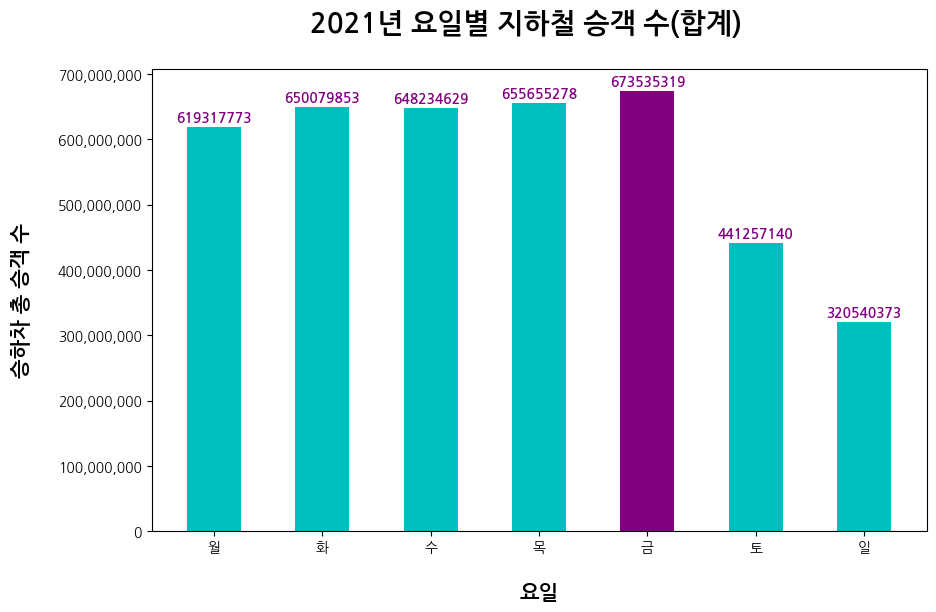

In [44]:
colors = ['c','c','c','c','purple','c','c'] # 그래프 색상 리스트

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df_week.index, df_week.values, color=colors, width=0.5) # 막대 그래프. x축: '요일'   y축: '승하차총승객수'

# 막대 그래프 위에 주석 추가.
for idx, val in df_week.items():
    plt.annotate(int(val), (idx, val), xytext=(0,4),
                 textcoords='offset points', ha='center', color='purple',fontsize=10, fontweight='bold')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.

fig.suptitle('2021년 요일별 지하철 승객 수(합계)', fontsize=20, fontweight='bold')
ax.set_xlabel('요일', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('승하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)

plt.show()

In [45]:
# 요일별로 승하차총승객수가 유의미한 차이가 있는가.
from scipy import stats
test_df = df.copy()

# '승하차총승객수'에 대한 정규성 검정을 월별로 수행
grouped = test_df.groupby('요일')
# 요일별로 D'Agostino's K-squared 검정을 수행
for week, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['승하차총승객수'].dropna())
    print(f"요일: {week} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{week}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{week}: 데이터는 정규분포를 따릅니다.")

요일: 금 - D’Agostino’s K-squared Test Statistic: 16162.557817432267, p-value: 0.0
금: 데이터는 정규분포를 따르지 않습니다.
요일: 목 - D’Agostino’s K-squared Test Statistic: 15403.789276222782, p-value: 0.0
목: 데이터는 정규분포를 따르지 않습니다.
요일: 수 - D’Agostino’s K-squared Test Statistic: 15527.1317382091, p-value: 0.0
수: 데이터는 정규분포를 따르지 않습니다.
요일: 월 - D’Agostino’s K-squared Test Statistic: 15772.999700450295, p-value: 0.0
월: 데이터는 정규분포를 따르지 않습니다.
요일: 일 - D’Agostino’s K-squared Test Statistic: 20094.61073565322, p-value: 0.0
일: 데이터는 정규분포를 따르지 않습니다.
요일: 토 - D’Agostino’s K-squared Test Statistic: 19850.760011164522, p-value: 0.0
토: 데이터는 정규분포를 따르지 않습니다.
요일: 화 - D’Agostino’s K-squared Test Statistic: 15462.485178231502, p-value: 0.0
화: 데이터는 정규분포를 따르지 않습니다.


In [46]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

# 요일별로 승하차총승객수 리스트 생성
grouped_data = test_df.groupby(['요일'])['승하차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='승하차총승객수', group_col='요일', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4)) # 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미. 출력을 보면 보기 불편함. 이걸 gpt에 복붙하고 표로 만들어달라고 하면 보기 편함.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 14082.460908189481, p-value: 0.0
유의미한 차이가 있으므로 Dunn's Test 사후검정 수행
     금    목    수    월    일    토    화
금  1.0  1.0  1.0  0.0  0.0  0.0  1.0
목  1.0  1.0  1.0  0.0  0.0  0.0  1.0
수  1.0  1.0  1.0  0.0  0.0  0.0  1.0
월  0.0  0.0  0.0  1.0  0.0  0.0  0.0
일  0.0  0.0  0.0  0.0  1.0  0.0  0.0
토  0.0  0.0  0.0  0.0  0.0  1.0  0.0
화  1.0  1.0  1.0  0.0  0.0  0.0  1.0


##일자별(월일별) 승하차승객수 그래프(pointplot) 그려 볼까요? (기준 :승하차총승객수)

In [47]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2021-01-01,금,1호선,동대문,3971,3799,7770,2021-01,01-01
1,2021-01-01,금,1호선,동묘앞,4153,4491,8644,2021-01,01-01
2,2021-01-01,금,1호선,서울역,9260,9858,19118,2021-01,01-01
3,2021-01-01,금,1호선,시청,2906,2654,5560,2021-01,01-01
4,2021-01-01,금,1호선,신설동,3367,3017,6384,2021-01,01-01


In [48]:
df_MD = df[['월일', '승하차총승객수']].copy()
df_MD = df_MD.groupby(['월일'])['승하차총승객수'].sum() # 각각의 '월일'별로 '승하차총승객수'의 합을 구함.
df_MD

,승하차총승객수
월일,
01-01,3149873
01-02,4866851
01-03,3791610
01-04,10493167
01-05,10478875
...,...
12-27,12097347
12-28,12725075
12-29,13095980


In [49]:
print(df_MD.min(), df_MD.max()) # 월별로 따로따로 그래프를 그리므로 y축 범위가 서로 다름. y축 범위를 같게 하기 위해 모든 '승하차총승객수' data의 최소, 최대를 구해봄.
                                # 이것을 기준으로 범위를 설정.

3149873 14250817


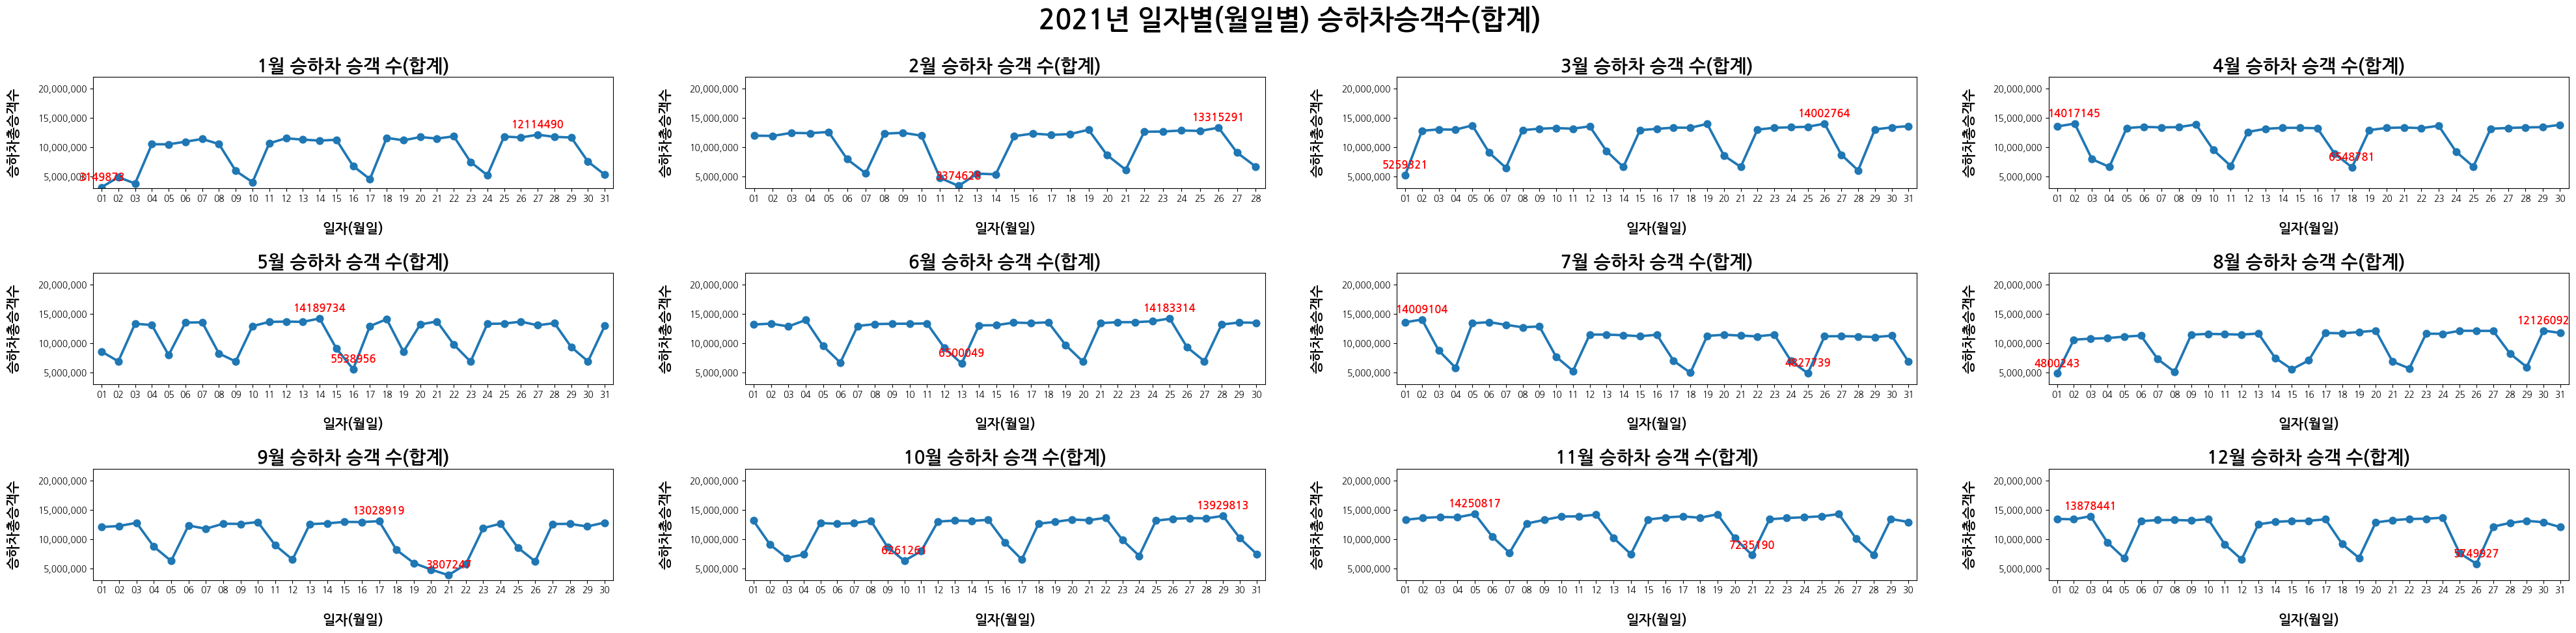

In [50]:
month = 1 # 1월부터 시작.

fig, axes = plt.subplots(3, 4, figsize=(40, 10)) # 2x3 행렬, figure 객체(그림객체) 크기는 가로40, 세로10.
for r in range(3): # 행(row)
    for c in range(4): # 열(column)
        if month < 10:
            df_M = df_MD[df_MD.index.str.startswith(f'0{month}')]  # df_MD의 인덱스(월일)가 f'0{month}'로 시작하는 것들만 저장.   ex. month = 1 이면 01로 시작하는 모든 data를 저장(즉, 1월 data만 저장)
        else:
            df_M = df_MD[df_MD.index.str.startswith(f'{month}')]
        day_list = df_M.index.str.split('-') # '-'를 기준으로 인덱스를 나눔. ex. 01-02 -> ['01', '02'] 이것을 1월의 모든 행에 적용하면 day_list = [['01', '01'], ['01', '02'], .....['01', '31']] 이 생성됨.
        day_list = day_list.str.get(1) # 그중 첫번째 인덱스의 값을 모두 가져옴. -> ['01', '02', ... '31'] <<<이해가 되지 않는다면 아래의 셀의 코드를 실행.>>>
        sns.pointplot(x=day_list, y=df_M.values, ax=axes[r, c]) # x축은 날짜(일), y축은 '승하차총승객수'
        df_M_max = df_M.max()
        df_M_min = df_M.min()

        # 월별로 최대값, 최소값인 지점만 주석 표시.
        for idx, val in zip(day_list[:], df_M[:].values):
            if(val == df_M_max): # 최대값 주석 표시
                axes[r,c].annotate(round(val), (idx, val), xytext=(0, 8), textcoords='offset points', fontsize=12, ha='center', color='red', fontweight='bold')
            elif(val == df_M_min): # 최소값 주석 표시
                axes[r,c].annotate(round(val), (idx, val), xytext=(0, 8), textcoords='offset points', fontsize=12, ha='center', color='red', fontweight='bold')

        axes[r,c].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.
        axes[r,c].set_ylim(3000000, 22000000) # y축의 범위 설정.

        # x,y축 이름 및 각각의 그래프 이름
        axes[r,c].set_xlabel('일자(월일)', fontsize=15, fontweight='bold', labelpad=20)
        axes[r,c].set_ylabel('승하차총승객수', fontsize=15, fontweight='bold', labelpad=20)
        axes[r,c].set_title(f'{month}월 승하차 승객 수(합계)', fontsize=20, fontweight='bold')

        month += 1 # month 1증가

fig.suptitle('2021년 일자별(월일별) 승하차승객수(합계)', fontsize=30, fontweight='bold')  # 전체 제목.
fig.set_layout_engine('tight', pad=2.0, h_pad=2.0, w_pad=5.0) # 그래프를 좀더 보기 편하게 하기 위한 부가적인 설정. gpt 검색 해봐도 됨.
plt.show()

In [51]:
# # 이해가 되지 않는다면 실행하는 코드  <<<<< [ctrl + /] 누르면 주석 해제 >>>>>
# month = 1 # 이 값을 마음대로 바꿔봐도 됨.
# df_M = df_MD[df_MD.index.str.startswith(f'0{month}')]  # df_MD의 인덱스(월일)가 f'0{month}'로 시작하는 것들만 저장.   ex. month = 1 이면 01로 시작하는 모든 data를 저장(즉, 1월 data만 저장)
# day_list = df_M.index.str.split('-') # '-'를 기준으로 인덱스를 나눔. ex. 01-02 -> ['01', '02'] 이것을 1월의 모든 행에 적용하면 day_list = [['01', '01'], ['01', '02'], .....['01', '31']] 이 생성됨.
# print(day_list)
# day_list = day_list.str.get(1) # 그중 첫번째 인덱스의 값을 모두 가져옴. -> ['01', '02', ... '31']
# print(day_list)

##가장 승객이 많이 타는 승차역은?

In [52]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2021-01-01,금,1호선,동대문,3971,3799,7770,2021-01,01-01
1,2021-01-01,금,1호선,동묘앞,4153,4491,8644,2021-01,01-01
2,2021-01-01,금,1호선,서울역,9260,9858,19118,2021-01,01-01
3,2021-01-01,금,1호선,시청,2906,2654,5560,2021-01,01-01
4,2021-01-01,금,1호선,신설동,3367,3017,6384,2021-01,01-01


In [53]:
df_stations = df.groupby(['역명'])['승차총승객수'].sum() # 각각의 '역명'별로 '승차총승객수'의 합을 구함.
df_stations

,승차총승객수
역명,
4.19민주묘지,903824
가능,2032353
가락시장,4953947
가산디지털단지,17804370
가양,6060881
...,...
회기,7389975
회룡,3823596
회현(남대문시장),6878240


In [54]:
df_stations = df_stations.sort_values(ascending=False)  # 내림차순 정렬
df_stations

,승차총승객수
역명,
잠실(송파구청),24832011
강남,24377843
고속터미널,22064907
서울역,20994624
홍대입구,20122988
...,...
남위례,40542
달월,29287
탕정,22569


In [55]:
station_top10 = df_stations[:10]
station_top10

,승차총승객수
역명,
잠실(송파구청),24832011
강남,24377843
고속터미널,22064907
서울역,20994624
홍대입구,20122988
신림,19272123
선릉,19074232
사당,18290895
가산디지털단지,17804370


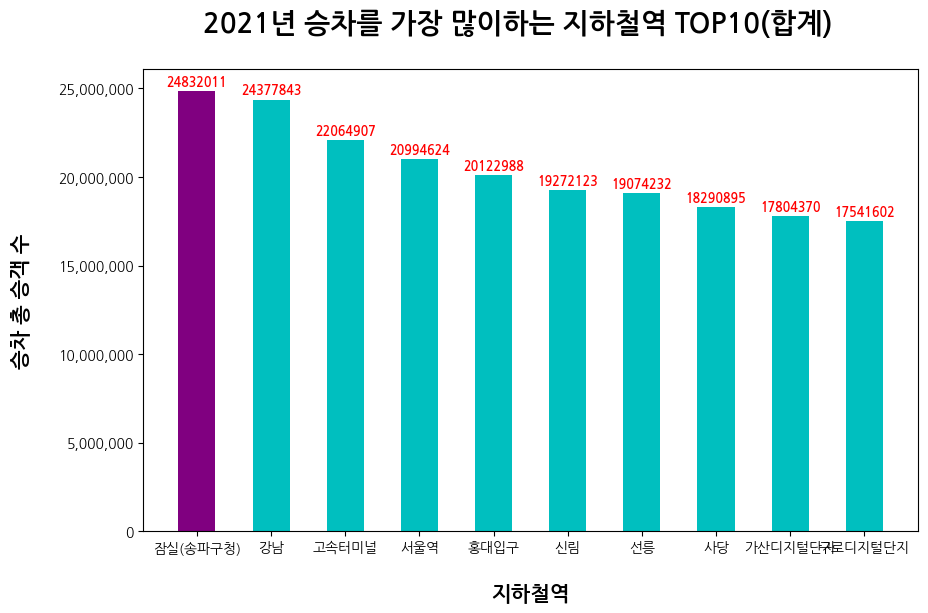

In [56]:
colors = ['purple','c','c','c','c','c','c','c','c','c']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(station_top10.index, station_top10.values, width=0.5, color=colors)

# 막대 그래프 위에 주석 표시
for idx, val in station_top10.items():
    ax.annotate(int(val), (idx, val), xytext=(0,4), textcoords='offset points', fontsize=9, fontweight='bold', ha='center', color='red')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.

ax.set_xlabel('지하철역', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('승차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)
fig.suptitle('2021년 승차를 가장 많이하는 지하철역 TOP10(합계)', fontsize=20, fontweight='bold')

plt.show()

In [57]:
print(f'승차를 가장 많이하는 지하철역: {df_stations.idxmax()} || 승차 승객 수: {int(df_stations.max())}')

승차를 가장 많이하는 지하철역: 잠실(송파구청) || 승차 승객 수: 24832011


In [58]:
# TOP10에서 지하철 역별로 승차총승객수가 유의미한 차이가 있는가.
from scipy import stats
date_list = list(station_top10.index)
test_df =  df[df['역명'].isin(date_list)].copy()

grouped = test_df.groupby('역명')

# 지하철 역별로 D'Agostino's K-squared 검정을 수행
for station, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['승차총승객수'].dropna())
    print(f"역명: {station} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{station}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{station}: 데이터는 정규분포를 따릅니다.")

역명: 가산디지털단지 - D’Agostino’s K-squared Test Statistic: 7721.094854760642, p-value: 0.0
가산디지털단지: 데이터는 정규분포를 따르지 않습니다.
역명: 강남 - D’Agostino’s K-squared Test Statistic: 47.82934907680514, p-value: 4.111391289689684e-11
강남: 데이터는 정규분포를 따르지 않습니다.
역명: 고속터미널 - D’Agostino’s K-squared Test Statistic: 246.37285650033778, p-value: 3.1682100376242694e-54
고속터미널: 데이터는 정규분포를 따르지 않습니다.
역명: 구로디지털단지 - D’Agostino’s K-squared Test Statistic: 114.23163465797904, p-value: 1.5664469975099765e-25
구로디지털단지: 데이터는 정규분포를 따르지 않습니다.
역명: 사당 - D’Agostino’s K-squared Test Statistic: 65.0451455474054, p-value: 7.509760851101713e-15
사당: 데이터는 정규분포를 따르지 않습니다.
역명: 서울역 - D’Agostino’s K-squared Test Statistic: 491.47144790041506, p-value: 1.898152415457948e-107
서울역: 데이터는 정규분포를 따르지 않습니다.
역명: 선릉 - D’Agostino’s K-squared Test Statistic: 6445.8815623035025, p-value: 0.0
선릉: 데이터는 정규분포를 따르지 않습니다.
역명: 신림 - D’Agostino’s K-squared Test Statistic: 50.2019619293574, p-value: 1.2554010185748624e-11
신림: 데이터는 정규분포를 따르지 않습니다.
역명: 잠실(송파구청) - D’A

In [59]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

# 지하철 역별로 승차총승객수 리스트 생성
grouped_data = test_df.groupby(['역명'])['승차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='승차총승객수', group_col='역명', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4).to_string(col_space=10)) # 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미. 출력을 보면 보기 불편함. 이걸 gpt에 복붙하고 표로 만들어달라고 하면 보기 편함.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 3244.933250831677, p-value: 0.0
유의미한 차이가 있으므로 Dunn's Test 사후검정 수행
              가산디지털단지         강남      고속터미널    구로디지털단지         사당        서울역         선릉         신림   잠실(송파구청)       홍대입구
가산디지털단지        1.0000     0.0000     0.1771     0.0000     0.0101        0.0     1.0000     0.0000     0.0000        0.0
강남             0.0000     1.0000     0.0000     0.0002     0.0000        0.0     0.0000     0.4982     0.0000        0.0
고속터미널          0.1771     0.0000     1.0000     0.0000     0.0000        0.0     0.1990     0.0000     0.0000        0.0
구로디지털단지        0.0000     0.0002     0.0000     1.0000     0.0000        0.0     0.0000     1.0000     0.0000        0.0
사당             0.0101     0.0000     0.0000     0.0000     1.0000        0.0     0.0088     0.0000     0.1953        0.0
서울역            0.0000     0.0000     0.0000     0.0000     0.0000        1.0     0.0000     0.0000     0.0000        0.0
선릉             1.0000     0.0000     0.1990     0.0000     

##노선별로 역별/요일별 승차승객수를 비교해 볼수 있을까? (1~9호선, 역별/요일별 heatmap)

In [60]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2021-01-01,금,1호선,동대문,3971,3799,7770,2021-01,01-01
1,2021-01-01,금,1호선,동묘앞,4153,4491,8644,2021-01,01-01
2,2021-01-01,금,1호선,서울역,9260,9858,19118,2021-01,01-01
3,2021-01-01,금,1호선,시청,2906,2654,5560,2021-01,01-01
4,2021-01-01,금,1호선,신설동,3367,3017,6384,2021-01,01-01


In [61]:
df['노선명'].unique()   # '노선명' 컬럼에 있는 데이터들의 종류를 unique()를 이용하여 살펴봄. 중복 제거되어서 나오므로 데이터 종류를 파악하기 쉬움.

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype=object)

In [62]:
fig, axes = plt.subplots(3, 3, figsize=(50,60))   # 3x3 행렬, figure(그림 객체) 사이즈: 가로50, 세로60

line_number = 1 # 1호선 부터 시작

for r in range(3): # 행(row)
    for c in range(3): # 열(column)
        df_line = df[df['노선명']==f'{line_number}호선'] # for문을 돌때마다 line_number가 1씩 증가.  ex. line_number=1 일때, df_line에는 1호선 data만 들어있음.
        df_line = df_line.groupby(['역명', '요일'])['승차총승객수'].sum()  # line_number를 k라고 할때, k호선의 data를 이용하여 각각의 '[역명, 요일]'별로 '승차총승객수'의 합을 구함.
        df_line = df_line.reset_index() # groupby()로 인해 '['역명', '요일']'이 index가 되었으므로 reset_index()를 이용하여 컬럼으로 다시 만들어줌.
        df_line = df_line.pivot_table(index='역명', columns='요일', values='승차총승객수') # pivot_table() 설명은 아래의 셀을 참조.
        df_line = df_line[['월', '화', '수', '목', '금', '토', '일']] # pivot_table()을 사용하면 컬럼이 한글일 때는 가나다 순으로 설정되므로 이 컬럼을 재정렬 시킴.
        #df_line = df_line.astype(int) # 히트맵 내부의 값들을 정수로 채우기 위해 int로 형변환.

        # 히트맵. 매개변수 순서대로 -> (데이터프레임, 각 셀 간의 경계선 두께, 히트맵의 색상 팔레트, 각 셀에 숫자(값)를 표시, 셀에 표시되는 숫자의 형식을 정수형(d)으로 설정, 서브플롯의 특정 위치)
        sns.heatmap(df_line, linewidths=0.5, cmap='Blues', annot=True, fmt='.0f', ax=axes[r,c])


        # 각 그래프의 그래프 이름, x,y축 이름
        axes[r,c].set_title(f'{line_number}호선 역별/요일별 승차승객수(합계)', fontsize=20, fontweight='bold')
        axes[r,c].set_xlabel(f'요일', fontsize=20, fontweight='bold')
        axes[r,c].set_ylabel(f'{line_number}호선 역명', fontsize=20, fontweight='bold')
        line_number += 1 # line_number 1증가

fig.set_layout_engine('tight', pad=5.0, h_pad=5.0, w_pad=5.0)  # 그래프를 좀더 보기 편하게 하기 위한 부가적인 설정.

fig.suptitle('2021년 지하철 역별/요일별 승차승객수(합계)', fontsize=30, fontweight='bold') # 전체 제목.
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [63]:
# # <<<<<[ ctrl+/ 누르면 주석 해제]>>>>>
# # pivot_table(index='역명', columns='요일', values='승차총승객수') -> """인덱스를 역명, 컬럼을 요일로 데이터 프레임을 구성하고, 그 안(각각의 셀 안)의 데이터 값들을 '승차총승객수'로 채워라."""" 라는 의미.
# line_number = 1
# df_line = df[df['노선명']==f'{line_number}호선'] # for문을 돌때마다 line_number가 1씩 증가.  ex. line_number=1 일때, df_line에는 1호선 data만 들어있음.
# df_line = df_line.groupby(['역명', '요일'])['승차총승객수'].sum()  # line_number를 k라고 할때, k호선의 data를 이용하여 각각의 '역명, 요일'별로 '승차총승객수'의 합을 구함.
# df_line = df_line.reset_index() # groupby()로 인해 '['역명', '요일']'이 index가 되었으므로 reset_index()를 이용하여 컬럼으로 다시 만들어줌.
# df_line = df_line.pivot_table(index='역명', columns='요일', values='승차총승객수') # pivot_table() 설명은 아래의 셀을 참조.
# df_line

##1호선에서 가장 하차를 많이 하는 역은? (groupby)

In [64]:
df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
0,2021-01-01,금,1호선,동대문,3971,3799,7770,2021-01,01-01
1,2021-01-01,금,1호선,동묘앞,4153,4491,8644,2021-01,01-01
2,2021-01-01,금,1호선,서울역,9260,9858,19118,2021-01,01-01
3,2021-01-01,금,1호선,시청,2906,2654,5560,2021-01,01-01
4,2021-01-01,금,1호선,신설동,3367,3017,6384,2021-01,01-01


In [65]:
df_line1 = df[df['노선명']=='1호선'] # 1호선 data만 저장
df_line1 = df_line1.groupby(['역명'])['하차총승객수'].sum() # 각각의 '역명'별로 '하차총승객수'의 합을 구함. 즉, 1월부터 6월까지 역명 별로 '하차총승객수'의 합을 구하는 코드.
df_line1                                                    # ex. 가능역 -> 1월부터 6월까지 하차총승객수 의 합. 하루하루의 하차총승객수를 다 더해야 함.

,하차총승객수
역명,
동대문,3441194
동묘앞,3104645
서울역,12050591
시청,5999840
신설동,4065120
제기동,5445738
종각,9253904
종로3가,7011150
종로5가,6577687


In [66]:
df_line1 = df_line1.sort_values(ascending=False)
df_line1

,하차총승객수
역명,
서울역,12050591
종각,9253904
종로3가,7011150
종로5가,6577687
청량리(서울시립대입구),6328964
시청,5999840
제기동,5445738
신설동,4065120
동대문,3441194


In [67]:
line1_station_top10 = df_line1[:10]

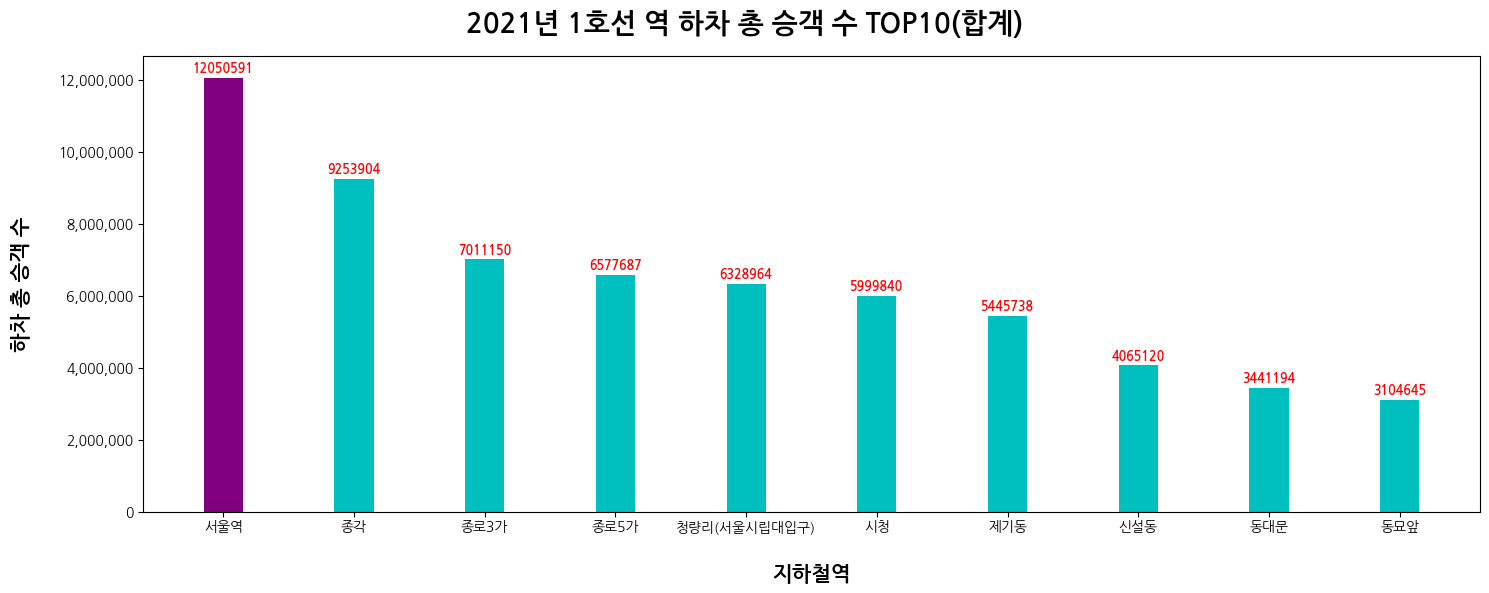

In [68]:
colors = ['purple','c','c','c','c','c','c','c','c','c']

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(line1_station_top10.index, line1_station_top10.values, width=0.3, color=colors)

# 막대 그래프 위 주석 표시
for idx, val in df_line1.items():
    ax.annotate(int(val), (idx, val), xytext=(0,4), textcoords='offset points',
                fontsize=9, fontweight='bold', ha='center', color='red')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))  # 기존 숫자의 단위를 유지.

ax.set_xlabel('지하철역', fontsize=15, fontweight='bold', labelpad=20)
ax.set_ylabel('하차 총 승객 수', fontsize=15, fontweight='bold', labelpad=20)
fig.suptitle('2021년 1호선 역 하차 총 승객 수 TOP10(합계)', fontsize=20, fontweight='bold')

fig.set_tight_layout(True)  # 그래프를 보기 편하게 하기 위한 부가적인 코드

plt.show()

In [69]:
print(f'1호선에서 하차를 가장 많이하는 지하철역: {df_line1.idxmax()}(하차 승객 수: {int(df_line1.max())})')

1호선에서 하차를 가장 많이하는 지하철역: 서울역(하차 승객 수: 12050591)


In [70]:
# 1호선 하차총승객수 TOP10에서 역별로 하차총승객수가 유의미한 차이가 있는가.
from scipy import stats
date_list = list(line1_station_top10.index)
test_df = df[df['노선명']=='1호선'].copy()
test_df = test_df[test_df['역명'].isin(date_list)]

grouped = test_df.groupby('역명')

# 1호선 역별로 D'Agostino's K-squared 검정을 수행
for station, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['하차총승객수'].dropna())
    print(f"역명: {station} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{station}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{station}: 데이터는 정규분포를 따릅니다.")

역명: 동대문 - D’Agostino’s K-squared Test Statistic: 83.82051463969985, p-value: 6.28936081956019e-19
동대문: 데이터는 정규분포를 따르지 않습니다.
역명: 동묘앞 - D’Agostino’s K-squared Test Statistic: 24.824951317897604, p-value: 4.067525783575429e-06
동묘앞: 데이터는 정규분포를 따르지 않습니다.
역명: 서울역 - D’Agostino’s K-squared Test Statistic: 26.684461526288043, p-value: 1.6052504609126602e-06
서울역: 데이터는 정규분포를 따르지 않습니다.
역명: 시청 - D’Agostino’s K-squared Test Statistic: 124.15944986136662, p-value: 1.094253701927387e-27
시청: 데이터는 정규분포를 따르지 않습니다.
역명: 신설동 - D’Agostino’s K-squared Test Statistic: 59.01653089554983, p-value: 1.5301117334669632e-13
신설동: 데이터는 정규분포를 따르지 않습니다.
역명: 제기동 - D’Agostino’s K-squared Test Statistic: 52.99865453862276, p-value: 3.100904510823186e-12
제기동: 데이터는 정규분포를 따르지 않습니다.
역명: 종각 - D’Agostino’s K-squared Test Statistic: 141.9717092009295, p-value: 1.4833206877341727e-31
종각: 데이터는 정규분포를 따르지 않습니다.
역명: 종로3가 - D’Agostino’s K-squared Test Statistic: 54.179462838369176, p-value: 1.7182214183936388e-12
종로3가: 데이터는 정규분포를 따르지 않

In [71]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

#  1호선 역별로 하차총승객수 리스트 생성
grouped_data = test_df.groupby(['역명'])['하차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='하차총승객수', group_col='역명', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4).to_string(col_space=10)) # 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미. 출력을 보면 보기 불편함. 이걸 gpt에 복붙하고 표로 만들어달라고 하면 보기 편함.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 2027.9560091383098, p-value: 0.0
유의미한 차이가 있으므로 Dunn's Test 사후검정 수행
                    동대문        동묘앞        서울역         시청        신설동        제기동         종각       종로3가       종로5가  청량리(서울시립대입구)
동대문              1.0000      0.181        0.0     0.0000     0.0349     0.0000     0.0000     0.0000     0.0000        0.0000
동묘앞              0.1810      1.000        0.0     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000        0.0000
서울역              0.0000      0.000        1.0     0.0000     0.0000     0.0000     0.0000     0.0000     0.0000        0.0000
시청               0.0000      0.000        0.0     1.0000     0.0000     0.0533     0.0000     0.0000     0.0372        1.0000
신설동              0.0349      0.000        0.0     0.0000     1.0000     0.0000     0.0000     0.0000     0.0000        0.0000
제기동              0.0000      0.000        0.0     0.0533     0.0000     1.0000     0.0000     0.0000     0.0000        0.0001
종각               0.0000

##2호선중에서 어느 역에서 승차가 가장 많이 발생할까? (Folium 역 표시)

In [72]:
df[df['역명']=='잠실(송파구청)']

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
52,2021-01-01,금,2호선,잠실(송파구청),17029,16152,33181,2021-01,01-01
276,2021-01-01,금,8호선,잠실(송파구청),4481,4522,9003,2021-01,01-01
650,2021-01-02,토,2호선,잠실(송파구청),28358,26540,54898,2021-01,01-02
874,2021-01-02,토,8호선,잠실(송파구청),7427,7584,15011,2021-01,01-02
1248,2021-01-03,일,2호선,잠실(송파구청),22484,21105,43589,2021-01,01-03
...,...,...,...,...,...,...,...,...,...
217723,2021-12-29,수,8호선,잠실(송파구청),14618,16980,31598,2021-12,12-29
218098,2021-12-30,목,2호선,잠실(송파구청),70773,70150,140923,2021-12,12-30
218325,2021-12-30,목,8호선,잠실(송파구청),15274,17403,32677,2021-12,12-30
218701,2021-12-31,금,2호선,잠실(송파구청),67434,68719,136153,2021-12,12-31


In [73]:
subway_location_df = pd.read_csv('rawfiles/지하철노선위경도정보2.csv')
subway_location_df.head()

,역이름,역지역,위도,경도,호선
0,낙성대,수도권,37.477090,126.963506,2호선
1,구룡,수도권,37.487027,127.059475,분당선
2,서울대입구,수도권,37.481285,126.952695,2호선
3,불광,수도권,37.610044,126.930302,3호선
4,월롱,수도권,37.796204,126.792563,경의선


In [74]:
# 병합(merge)할 왼쪽 dataframe은 subway_raw(여기서는 줄곧 df라는 이름으로 사용했음). 병합(merge)할 오른쪽 dataframe은 subway_location_df(지하철역의 위도/경도 data)
# 왼쪽dataframe.merge(오른쪽dataframe, left_on=[병합의 기준이 될 왼쪽dataframe의 컬럼(들)], left_on=[병합의 기준이 될 오른쪽dataframe의 컬럼(들)])
# 왼쪽dataframe은 LD, 오른쪽 dataframe은 RD라고 하면,
# 아래의 코드는 <<< '역명(LD)'과 '역이름(RD)'이 서로 같으면서, '노선명(LD)'과 '호선(RD)'까지 같은 것 >>> 끼리만 병합(merge)
subway_lon_lat_df = df.merge(subway_location_df, left_on=['역명', '노선명'], right_on=['역이름', '호선'])
subway_lon_lat_df.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,역이름,역지역,위도,경도,호선
0,2021-01-01,금,1호선,동대문,3971,3799,7770,2021-01,01-01,동대문,수도권,37.571664,127.010618,1호선
1,2021-01-01,금,1호선,동묘앞,4153,4491,8644,2021-01,01-01,동묘앞,수도권,37.573213,127.016346,1호선
2,2021-01-01,금,1호선,서울역,9260,9858,19118,2021-01,01-01,서울역,수도권,37.553316,126.969738,1호선
3,2021-01-01,금,1호선,시청,2906,2654,5560,2021-01,01-01,시청,수도권,37.565337,126.977181,1호선
4,2021-01-01,금,1호선,시청,2906,2654,5560,2021-01,01-01,시청,부산,35.179676,129.076559,1호선


In [75]:
line2_info = subway_lon_lat_df[subway_lon_lat_df['노선명'] == '2호선']  # 2호선인 데이터만 추출
line2_info.head()

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,역이름,역지역,위도,경도,호선
11,2021-01-01,금,2호선,강남,13089,12668,25757,2021-01,01-01,강남,수도권,37.498085,127.027978,2호선
12,2021-01-01,금,2호선,건대입구,10699,11456,22155,2021-01,01-01,건대입구,수도권,37.540398,127.069203,2호선
13,2021-01-01,금,2호선,구로디지털단지,12160,12055,24215,2021-01,01-01,구로디지털단지,수도권,37.485253,126.901473,2호선
14,2021-01-01,금,2호선,당산,3992,4340,8332,2021-01,01-01,당산,수도권,37.534774,126.902607,2호선
15,2021-01-01,금,2호선,도림천,235,244,479,2021-01,01-01,도림천,수도권,37.514501,126.882636,2호선


In [76]:
line2_lon_lat = line2_info[['사용일자', '역이름', '역지역', '위도', '경도', '호선', '승차총승객수']]  # 데이터분석에 필요한 컬럼만 남김. 이름은 다르지만 의미가 중복되는 컬럼도 제거.
line2_lon_lat.head()

,사용일자,역이름,역지역,위도,경도,호선,승차총승객수
11,2021-01-01,강남,수도권,37.498085,127.027978,2호선,13089
12,2021-01-01,건대입구,수도권,37.540398,127.069203,2호선,10699
13,2021-01-01,구로디지털단지,수도권,37.485253,126.901473,2호선,12160
14,2021-01-01,당산,수도권,37.534774,126.902607,2호선,3992
15,2021-01-01,도림천,수도권,37.514501,126.882636,2호선,235


In [77]:
# 각각의 ['역이름', '역지역', '위도', '경도', '호선']별로 '하차총승객수'의 합을 구함.
# ['역이름', '역지역', '위도', '경도', '호선']가 모두 같으면 하나의 그룹. 그룹별로 '승차총승객수'의 합을 구하는 것임.
line2_lon_lat = line2_lon_lat.groupby(['역이름', '역지역', '위도', '경도', '호선'])['승차총승객수'].sum()
line2_lon_lat = line2_lon_lat.reset_index().sort_values(by='승차총승객수', ascending=False) # '승차총승객수' 기준으로 내림차순 정렬. dataframe의 메서드인 sort_values() 매개변수 안에 by='기준이 되는 컬럼명'을 넣어줘야 함.
line2_lon_lat.head()                                                                        # Series의 메서드인 sort_values()에서는 by를 쓸 필요 없음.

,역이름,역지역,위도,경도,호선,승차총승객수
0,강남,수도권,37.498085,127.027978,2호선,24377843
19,신림,수도권,37.484264,126.929741,2호선,19272123
2,구로디지털단지,수도권,37.485253,126.901473,2호선,17541602
37,홍대입구,수도권,37.556864,126.923765,2호선,16553105
12,선릉,수도권,37.504494,127.048948,2호선,15395825


In [78]:
line2_lon_lat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   역이름     38 non-null     object 
 1   역지역     38 non-null     object 
 2   위도      38 non-null     float64
 3   경도      38 non-null     float64
 4   호선      38 non-null     object 
 5   승차총승객수  38 non-null     int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 2.1+ KB


In [79]:
!pip install folium  # 지도를 그리기 위해 folium 모듈 설치

In [80]:
import folium
from folium.plugins import HeatMap

max_value = line2_lon_lat['승차총승객수'].max() # 지도 상에서 최댓값을 갖는 2호선 지하철 역을 표시할 때 다른 색으로 표시하기 위해 작성.

m = folium.Map(location=[37.5350, 126.9780], zoom_start=12)  # 지도 객체 생성. location ->지도가 출력됬을 때 보여질 위치. 서울 중심부로 설정함. zoom_start -> 확대 크기. 숫자가 커질수록 줌인.

# 지도 상에 지하철 역을 표시하기 위한 코드
for idx, row in line2_lon_lat.iterrows(): # line2_lon_lat 데이터 프레임의 행을 추출하기 위해 iterrows()를 사용. 이 메서드는 인덱스와 행을 하나씩 추출해줌.
    if row['승차총승객수'] == max_value:
        folium.Marker([row['위도'], row['경도']], popup=f"승차 총 승객 수 {int(row['승차총승객수'])}", # folium.Marker -> 지도 상에 마커를 표시. popup -> 마커를 클릭하면 popup의 내용이 나옴.
                  tooltip=row['역이름'] ,icon=folium.Icon(icon='star', color='orange')).add_to(m)      # tooltip -> 마커에 마우스 커서를 갖다대면 역이름이 표시됨.  icon -> 지도 상에 서 표시될 마커의 형태.
    else:                                                                                              # add_to(m) -> 지도 객체에 추가.
        folium.Marker([row['위도'], row['경도']], popup=f"승차 총 승객 수 {int(row['승차총승객수'])}",
                    tooltip=row['역이름'] ,icon=folium.Icon(icon='star')).add_to(m)

HeatMap(line2_lon_lat[['위도', '경도', '승차총승객수']], radius=25, min_opacity=0.7).add_to(m) # 지도 상에 히트맵 추가. line2_lon_lat[['위도', '경도', '승차총승객수']] -> 히트맵에 사용할 데이터를 지정.
                                                                                               # radius -> 각 히트맵 점의 반경을 설정. min_opacity -> 히트맵의 최소 불투명도. 값이 0에 가까울수록 투명해짐.

# 지도 객체 출력
m

In [81]:
line2_lon_lat['역이름'].head(10)

,역이름
0,강남
19,신림
2,구로디지털단지
37,홍대입구
12,선릉
18,신도림
25,역삼
9,사당
30,을지로입구
1,건대입구


In [82]:
# 2호선 역별로 승차총승객수가 유의미한 차이가 있는가.
from scipy import stats
date_list = list(line2_lon_lat['역이름'].head(10))  # top10만 추출
test_df = df[df['노선명']=='2호선'].copy()
test_df = test_df[test_df['역명'].isin(date_list)]

grouped = test_df.groupby('역명')

# 2호선 역별로 D'Agostino's K-squared 검정을 수행
for station, group in grouped:
    # 결측값 제거 후 D'Agostino's K-squared 검정 수행
    stat, p_value = stats.normaltest(group['승차총승객수'].dropna())
    print(f"역명: {station} - D’Agostino’s K-squared Test Statistic: {stat}, p-value: {p_value}")
    if p_value < 0.05:
        print(f"{station}: 데이터는 정규분포를 따르지 않습니다.")
    else:
        print(f"{station}: 데이터는 정규분포를 따릅니다.")

역명: 강남 - D’Agostino’s K-squared Test Statistic: 47.82934907680514, p-value: 4.111391289689684e-11
강남: 데이터는 정규분포를 따르지 않습니다.
역명: 건대입구 - D’Agostino’s K-squared Test Statistic: 59.94467018249446, p-value: 9.620114921127462e-14
건대입구: 데이터는 정규분포를 따르지 않습니다.
역명: 구로디지털단지 - D’Agostino’s K-squared Test Statistic: 114.23163465797904, p-value: 1.5664469975099765e-25
구로디지털단지: 데이터는 정규분포를 따르지 않습니다.
역명: 사당 - D’Agostino’s K-squared Test Statistic: 41.62150433761928, p-value: 9.162313947413129e-10
사당: 데이터는 정규분포를 따르지 않습니다.
역명: 선릉 - D’Agostino’s K-squared Test Statistic: 185.17372801163276, p-value: 6.166459245215657e-41
선릉: 데이터는 정규분포를 따르지 않습니다.
역명: 신도림 - D’Agostino’s K-squared Test Statistic: 54.941379810909524, p-value: 1.1738996144577845e-12
신도림: 데이터는 정규분포를 따르지 않습니다.
역명: 신림 - D’Agostino’s K-squared Test Statistic: 50.2019619293574, p-value: 1.2554010185748624e-11
신림: 데이터는 정규분포를 따르지 않습니다.
역명: 역삼 - D’Agostino’s K-squared Test Statistic: 331.1229739639474, p-value: 1.2518716026157096e-72
역삼: 데이터는 정규분포를 따르지 

In [83]:
# Kruskal-Wallis 검정
import scikit_posthocs as sp

# 2호선 역별로 승차총승객수 리스트 생성
grouped_data = test_df.groupby(['역명'])['승차총승객수'].apply(list)

# Kruskal-Wallis 검정 수행
stat, p_value = stats.kruskal(*grouped_data)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p_value}")

if p_value < 0.05:
    print("유의미한 차이가 있으므로 Dunn's Test 사후검정 수행")

    # Dunn's Test 사후검정. val_col: 비교할 값(연속형 데이터)이 들어 있는 열의 이름, group_col: 그룹으로 나눌 기준이 되는 열의 이름.
    dunn_result = sp.posthoc_dunn(test_df, val_col='승차총승객수', group_col='역명', p_adjust='bonferroni')  # p_adjust='bonferroni'는 다중 비교를 보정하기 위한 방법으로 'bonferroni'를 사용.
    print(dunn_result.round(4).to_string(col_space=10)) # 0.05 미만이면 둘 사이에 유의미한 차이 있음을 의미. 출력을 보면 보기 불편함. 이걸 gpt에 복붙하고 표로 만들어달라고 하면 보기 편함.
else:
    print("유의미한 차이가 없습니다.")

Kruskal-Wallis H-statistic: 1383.0614991334035, p-value: 3.531082195068696e-292
유의미한 차이가 있으므로 Dunn's Test 사후검정 수행
                   강남       건대입구    구로디지털단지         사당         선릉        신도림         신림         역삼      을지로입구       홍대입구
강남             1.0000     0.0000     0.0000        0.0     0.0000     0.0000     0.0006     0.0000     0.0000     0.0000
건대입구           0.0000     1.0000     0.0000        1.0     0.0000     0.0000     0.0000     0.0000     0.8613     0.0000
구로디지털단지        0.0000     0.0000     1.0000        0.0     0.0009     0.0000     0.0037     0.0000     0.0000     0.2423
사당             0.0000     1.0000     0.0000        1.0     0.0000     0.0000     0.0000     0.0000     1.0000     0.0000
선릉             0.0000     0.0000     0.0009        0.0     1.0000     0.1107     0.0000     0.0121     0.0000     1.0000
신도림            0.0000     0.0000     0.0000        0.0     0.1107     1.0000     0.0000     1.0000     0.0000     0.0003
신림             0.0006     0.0000     0.

In [84]:
df[df['역명']=='잠실(송파구청)']

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
52,2021-01-01,금,2호선,잠실(송파구청),17029,16152,33181,2021-01,01-01
276,2021-01-01,금,8호선,잠실(송파구청),4481,4522,9003,2021-01,01-01
650,2021-01-02,토,2호선,잠실(송파구청),28358,26540,54898,2021-01,01-02
874,2021-01-02,토,8호선,잠실(송파구청),7427,7584,15011,2021-01,01-02
1248,2021-01-03,일,2호선,잠실(송파구청),22484,21105,43589,2021-01,01-03
...,...,...,...,...,...,...,...,...,...
217723,2021-12-29,수,8호선,잠실(송파구청),14618,16980,31598,2021-12,12-29
218098,2021-12-30,목,2호선,잠실(송파구청),70773,70150,140923,2021-12,12-30
218325,2021-12-30,목,8호선,잠실(송파구청),15274,17403,32677,2021-12,12-30
218701,2021-12-31,금,2호선,잠실(송파구청),67434,68719,136153,2021-12,12-31


In [85]:
df[df['노선명']=='2호선']

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일
10,2021-01-01,금,2호선,강남,13089,12668,25757,2021-01,01-01
11,2021-01-01,금,2호선,강변(동서울터미널),7925,8325,16250,2021-01,01-01
12,2021-01-01,금,2호선,건대입구,10699,11456,22155,2021-01,01-01
13,2021-01-01,금,2호선,교대(법원.검찰청),4364,4638,9002,2021-01,01-01
14,2021-01-01,금,2호선,구로디지털단지,12160,12055,24215,2021-01,01-01
...,...,...,...,...,...,...,...,...,...
218704,2021-12-31,금,2호선,종합운동장,6775,7415,14190,2021-12,12-31
218705,2021-12-31,금,2호선,충정로(경기대입구),8362,8565,16927,2021-12,12-31
218706,2021-12-31,금,2호선,한양대,5705,5435,11140,2021-12,12-31
218707,2021-12-31,금,2호선,합정,28581,29912,58493,2021-12,12-31
